# Data Diversity Kids - Index and Demographic Analysis

In [88]:
## Need to import some packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Datasets used

### COI 2.0 index data - Child Opportunity Levels, Scores and averaged z-scores for the overall index and three domains
https://data.diversitydatakids.org/dataset/coi20-child-opportunity-index-2-0-database/resource/080cfe52-90aa-4925-beaa-90efb04ab7fb

This is going to be what is used to get the **c5_COI_nat** (text from "very low" to "very high") and the **r_COI_nat** (nationally-normed Child Opportunity Scores (from 1 to 100) for the overall COI. The project is suppsoed to have at least 10,000 data items, and this index database has 144,408 entries with 37 columns. 

### Gini Index 
https://data.census.gov/cedsci/table?q=Gini%20index&g=0100000US%241400000&tid=ACSDT5Y2019.B19083

I have decided to use the gini index from the census website. I also went with the 2015 one so that it would align with the COI. 

## Interesting Questions: 
1) Is there a connection between the Gini index and the Socioeconomic Index when it hits a certain range? 

2) Which category of the Socioeconomic group has the highest average Gini index or more specifically are places that are more socioeconomially disadvantaged have more income inequality? 

3) Is there a place of high income inequality and low socioeconomic opportunity that we need to start raising attention to? 

### Prepping the Data

In [90]:
### Prep the Data 
coi_df = pd.read_csv('data/index.csv')
gini_df = pd.read_csv('data/gini.csv')
gini_df = gini_df[1:] # Had to get rid of some of the unnecessary row 
gini_df.columns = ['geoid','gini','me_gini','tract']
coi_df = coi_df[coi_df['year']==2015]
## Merging the table of COI and Gini Index
gini_df['geoid'] = gini_df['geoid'].apply(lambda x: int(x[9:]))
gini_coi = pd.merge(coi_df,gini_df,on='geoid')
## Address the nan
gini_coi['gini'] = gini_coi[gini_coi['gini'] != '-']['gini'].apply(lambda x: float(x))
gini_coi = gini_coi.dropna().copy()

### Checking the data out

In [91]:
coi_df 

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,r_SE_stt,r_COI_stt,c5_ED_met,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met
1,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,83,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,26,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,60,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,79,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,88,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144399,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,40,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144401,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,33,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144403,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,33,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144405,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
gini_df

,geoid,gini,me_gini,tract
1,1001020100,0.513,0.145,"Census Tract 201, Autauga County, Alabama"
2,1001020200,0.386,0.053,"Census Tract 202, Autauga County, Alabama"
3,1001020300,0.405,0.037,"Census Tract 203, Autauga County, Alabama"
4,1001020400,0.357,0.018,"Census Tract 204, Autauga County, Alabama"
5,1001020500,0.334,0.028,"Census Tract 205, Autauga County, Alabama"
...,...,...,...,...
73998,72153750501,0.491,0.042,"Census Tract 7505.01, Yauco Municipio, Puerto ..."
73999,72153750502,0.547,0.055,"Census Tract 7505.02, Yauco Municipio, Puerto ..."
74000,72153750503,0.563,0.080,"Census Tract 7505.03, Yauco Municipio, Puerto ..."
74001,72153750601,0.462,0.041,"Census Tract 7506.01, Yauco Municipio, Puerto ..."


In [84]:
gini_coi

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met,gini,me_gini,tract
52,1007010001,2015,1.0,13820.0,"Birmingham-Hoover, AL Metro Area",1007,1,AL,646,-0.061803,...,Low,Moderate,Low,20.0,21.0,47.0,38.0,0.358,0.054,"Census Tract 100.01, Bibb County, Alabama"
53,1007010002,2015,1.0,13820.0,"Birmingham-Hoover, AL Metro Area",1007,1,AL,1656,-0.058724,...,Low,Low,Low,22.0,24.0,30.0,28.0,0.385,0.041,"Census Tract 100.02, Bibb County, Alabama"
54,1007010003,2015,1.0,13820.0,"Birmingham-Hoover, AL Metro Area",1007,1,AL,1097,-0.060043,...,Low,Moderate,Low,20.0,27.0,48.0,40.0,0.404,0.046,"Census Tract 100.03, Bibb County, Alabama"
55,1007010004,2015,1.0,13820.0,"Birmingham-Hoover, AL Metro Area",1007,1,AL,1329,-0.090723,...,Low,Very Low,Very Low,6.0,26.0,16.0,15.0,0.430,0.039,"Census Tract 100.04, Bibb County, Alabama"
56,1009050101,2015,1.0,13820.0,"Birmingham-Hoover, AL Metro Area",1009,1,AL,1662,-0.040372,...,Low,Moderate,Low,37.0,37.0,45.0,40.0,0.400,0.033,"Census Tract 501.01, Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72000,55133204301,2015,1.0,33340.0,"Milwaukee-Waukesha-West Allis, WI Metro Area",55133,55,WI,1465,0.062696,...,Very High,High,High,68.0,94.0,78.0,76.0,0.345,0.035,"Census Tract 2043.01, Waukesha County, Wisconsin"
72001,55133204302,2015,1.0,33340.0,"Milwaukee-Waukesha-West Allis, WI Metro Area",55133,55,WI,933,0.068986,...,Moderate,Moderate,Moderate,71.0,56.0,53.0,56.0,0.479,0.067,"Census Tract 2043.02, Waukesha County, Wisconsin"
72002,55133204400,2015,1.0,33340.0,"Milwaukee-Waukesha-West Allis, WI Metro Area",55133,55,WI,418,0.067647,...,Moderate,High,High,71.0,55.0,74.0,72.0,0.477,0.055,"Census Tract 2044, Waukesha County, Wisconsin"
72003,55133204501,2015,1.0,33340.0,"Milwaukee-Waukesha-West Allis, WI Metro Area",55133,55,WI,561,0.039645,...,Very High,Very High,High,60.0,100.0,84.0,80.0,0.367,0.061,"Census Tract 2045.01, Waukesha County, Wisconsin"


### Question #1: Is there a correlation between the Gini Index and the Socioeconomic Index? 

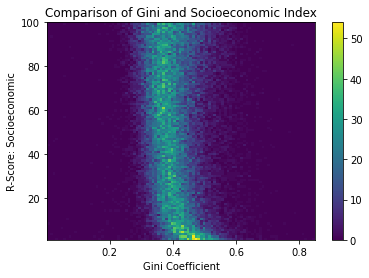

In [69]:
fig, ax = plt.subplots()
plt.hist2d(gini_coi['gini'],gini_coi['r_SE_nat'], bins = (100,100)) # x-axis, y-axis, 
plt.title("Comparison of Gini and Socioeconomic Index")
plt.xlabel('Gini Coefficient') 
plt.ylabel('R-Score: Socioeconomic') 
plt.colorbar()
plt.show()

For counties with R-Score for Socioeconomic that is less than 20 their gini coefficient drastically starts increasing and this means that there is more income inequality in these places. For places with socioeconomic index of above 20 the gini coefficient is prettyconsistnent around 0.4 though you can definitely see a difference for the ones below 20 that is now having gini coefficient of around 0.5. 

### Question #2: Which category of the Socioeconomic group has the highest average Gini index? 

In [85]:
COI_SE = gini_coi.groupby(['c5_SE_nat'])['gini'].aggregate([np.average]).sort_values(ascending=False,by='average')
COI_SE

,average
c5_SE_nat,
Very Low,0.431842
Low,0.403281
Very High,0.396879
Moderate,0.394742
High,0.392801


### Question #3: Is there a place with high income inequality and low socioeconomic index that we need to start paying more attention to? 

In [86]:
gini_coi.groupby(by='msaname15')['gini'].agg(np.mean).sort_values(ascending = False)

msaname15
McAllen-Edinburg-Mission, TX Metro Area                    0.455631
Bridgeport-Stamford-Norwalk, CT Metro Area                 0.438276
New Orleans-Metairie, LA Metro Area                        0.429975
Baton Rouge, LA Metro Area                                 0.429520
Durham-Chapel Hill, NC Metro Area                          0.429343
                                                             ...   
Colorado Springs, CO Metro Area                            0.381148
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    0.375672
Salt Lake City, UT Metro Area                              0.370645
Provo-Orem, UT Metro Area                                  0.365225
Ogden-Clearfield, UT Metro Area                            0.355453
Name: gini, Length: 100, dtype: float64

In [87]:
gini_coi.groupby(by='msaname15')['r_SE_nat'].agg(np.mean).sort_values(ascending = True)

msaname15
Stockton-Lodi, CA Metro Area                          29.107914
McAllen-Edinburg-Mission, TX Metro Area               29.189189
El Paso, TX Metro Area                                31.981366
Bakersfield, CA Metro Area                            32.850340
Fresno, CA Metro Area                                 33.832487
                                                        ...    
Provo-Orem, UT Metro Area                             68.116279
Salt Lake City, UT Metro Area                         69.318182
Minneapolis-St. Paul-Bloomington, MN-WI Metro Area    70.726115
Madison, WI Metro Area                                71.861538
San Jose-Sunnyvale-Santa Clara, CA Metro Area         71.963446
Name: r_SE_nat, Length: 100, dtype: float64

McAllen-Edinburg-Mission, TX Metro Area is the area with the highest average gini index which means that it is the most wealth inequality and then it also has one of the lowest socioeconomic opoportunity index value. This means that more needs to be donein this area, so that there is more socioeconomic opportunity, so that potentially there is less wealth inequality. Another observation I made was that in CA there is a ton of places where the socioeconomic index is quite low, so the state needs to work on that. It is suprising that Utah has lowest gini index scores, and I wonder why that is the case. 

# Conclusion 
There is a lot that I would like to explore with a ton of question that I think is left unanswered because I do have a ton of data, so I hope to continue exploring this in future PAs and free time! Though that is all for now, and I thank you for taking the time to read and check out my project. 